# RQ5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dateparse (time_in_secs):
    return pd.to_datetime(time_in_secs,unit='s')

In [3]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=20000, parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], date_parser=dateparse)


In [4]:
dataset['author.playtime_forever']=pd.to_timedelta(dataset['author.playtime_forever'], unit='m')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      20000 non-null  int64         
 1   app_id                          20000 non-null  int64         
 2   app_name                        20000 non-null  object        
 3   review_id                       20000 non-null  int64         
 4   language                        20000 non-null  object        
 5   review                          19934 non-null  object        
 6   timestamp_created               20000 non-null  datetime64[ns]
 7   timestamp_updated               20000 non-null  datetime64[ns]
 8   recommended                     20000 non-null  bool          
 9   votes_helpful                   20000 non-null  int64         
 10  votes_funny                     20000 non-null  int64         
 11  we

In [10]:
dataset[(dataset["author.num_reviews"] == 2063)]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7320,7320,292030,The Witcher 3: Wild Hunt,83988894,english,"- Great stories, setting, monsters, and lore.\...",2021-01-04 13:44:24,2021-01-04 13:44:24,True,0,...,True,False,False,76561198202529859,1567,2063,282.0,0.0,282.0,2021-01-04 13:43:36


#### 1 - Plot the top 10 most popular reviewers and the number of reviews.

I look at the "author.num_reviews" variable to see how many reviews a person has done for a given application. I add up the various values that the variable takes for the various applications to see the total number of reviews that a given person has made. Finally, I group these values by the author's name (or better, by the author's identification code -> "author.steamid").

I sort in descending order to see which are the most popular authors.

In [20]:
dataset.groupby(["author.steamid"])["author.num_reviews"].first().sort_values(ascending=False).head(10)

author.steamid
76561198202529859    2063
76561198027286434    1162
76561197967685936     683
76561198093363183     484
76561198066952727     385
76561197961768818     295
76561198022195583     273
76561198836059111     265
76561197972610127     247
76561197969538443     208
Name: author.num_reviews, dtype: int64

In [8]:
def mostPopularReviewers(n):
    return dataset[["author.steamid", "author.num_reviews"]].groupby(["author.steamid"]).first().sort_values("author.num_reviews",ascending=False).head(n)

In [56]:
mostPopularReviewers(1).index[0]

76561198125392509

In [71]:
dataset[dataset['author.steamid']==mostPopularReviewers(1).index[0]].app_name.unique()

array(['The Witcher 3: Wild Hunt'], dtype=object)

In [6]:
def mostPopularReviewers_plot(n):

    data = mostPopularReviewers(n)

    height = data["author.num_reviews"].array
    val = list(map(str,data.index))

    my_cmap = plt.get_cmap('Greys')
    my_norm = plt.Normalize(vmin=0,vmax=(data["author.num_reviews"].max())*0.2)
    
    plt.figure(figsize=(30,5))
    
    plot = plt.bar(val, height, color=my_cmap(my_norm(height)));
    plt.xlabel('author.steamid', labelpad=25.0, size="xx-large")
    plt.ylabel('Number of reviews', labelpad=25.0, size="xx-large")
    plt.title('Reviews by author')
    if(n > 10):
        plt.xticks(rotation="vertical")
        
    return plot
 

In [ ]:
dataset.groupby(["author.steamid"])["author.num_reviews"].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(18,9), xlabel='author.steamid', ylabel='Number of reviews', title='Reviews by author')

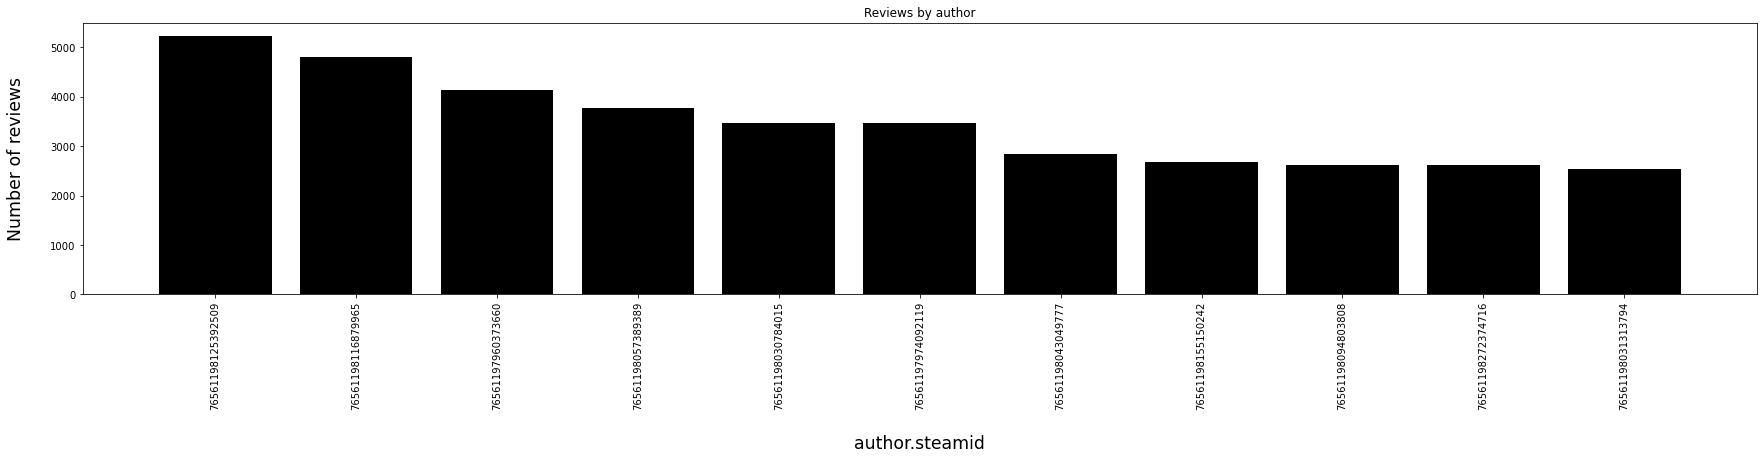

In [60]:
mostPopularReviewers_plot(11);

#### 2 - What applications did the most popular author review?

I consider the identification code of the most popular author and I check which applications he has reviewed.

In [72]:
dataset[dataset['author.steamid']==76561198202529859].app_name.unique()

array(['The Witcher 3: Wild Hunt'], dtype=object)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      20000 non-null  int64         
 1   app_id                          20000 non-null  int64         
 2   app_name                        20000 non-null  object        
 3   review_id                       20000 non-null  int64         
 4   language                        20000 non-null  object        
 5   review                          19934 non-null  object        
 6   timestamp_created               20000 non-null  datetime64[ns]
 7   timestamp_updated               20000 non-null  datetime64[ns]
 8   recommended                     20000 non-null  bool          
 9   votes_helpful                   20000 non-null  int64         
 10  votes_funny                     20000 non-null  int64         
 11  we

In [174]:
dataset[['author.steamid', "steam_purchase", "received_for_free"]].groupby('author.steamid', as_index=False).sum()

,author.steamid,steam_purchase,received_for_free
0,76561197960265730,0,1
1,76561197960265890,1,0
2,76561197960266039,1,0
3,76561197960266130,0,0
4,76561197960266309,1,0
...,...,...,...
1819571,76561199132738141,1,0
1819572,76561199132836705,1,0
1819573,76561199132868139,1,0
1819574,76561199133025494,1,0


In [34]:
t = dataset[['author.steamid',"app_name", "timestamp_created", "author.num_reviews","steam_purchase",'received_for_free', "author.playtime_forever", "author.num_games_owned"]]

In [61]:
t[dataset['author.steamid']==76561198125392509]

,author.steamid,app_name,timestamp_created,author.num_reviews,steam_purchase,received_for_free,author.playtime_forever,author.num_games_owned
504382,76561198125392509,Half-Life,2018-06-27 00:38:32,5236,False,False,0 days 00:20:00,652
575674,76561198125392509,Counter-Strike: Source,2018-06-23 07:06:41,5236,False,False,0 days 00:09:00,652
656318,76561198125392509,Half-Life 2: Episode Two,2018-06-28 22:47:06,5236,False,False,0 days 00:10:00,652
1258197,76561198125392509,Garry's Mod,2018-03-24 12:25:36,5236,True,False,437 days 03:12:00,652


#### 3 - How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [7]:
def percentageOfReceived():
    
    freeAndPurchase = dataset[['author.steamid', "steam_purchase", "received_for_free"]].groupby('author.steamid', as_index=False).sum()
    
    freeAndPurchase = freeAndPurchase[freeAndPurchase['author.steamid']==mostPopularReviewers(1).index[0]]
   
    percPurchase = freeAndPurchase[["steam_purchase", "received_for_free"]].apply(lambda row: row["steam_purchase"]/(row["steam_purchase"] + row["received_for_free"]), axis=1)
    
    percFree = freeAndPurchase[["steam_purchase", "received_for_free"]].apply(lambda row: row["received_for_free"]/(row["steam_purchase"] + row["received_for_free"]),axis=1)
    
    final = freeAndPurchase
    
    final["percentage_of_purchase"] = percPurchase
    final["percentage_of_free"] = percFree
    
    return final

In [63]:
percentageOfReceived()

,author.steamid,steam_purchase,received_for_free,percentage_of_purchase,percentage_of_free
699542,76561198125392509,1,0,1.0,0.0


I check among the apps he reviewed which ones he bought on steam and which ones he didn't buy on steam and how many are these apps.

In [8]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==True)].app_name.unique()

array([], dtype=object)

In [10]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==False)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod",
       "Sid Meier's Civilization V"], dtype=object)

In [11]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==False)].app_name.nunique()

7

I see that this person hasn't bought any apps on steam.

I check how many apps the author has received for free and how many are these apps.

In [12]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.unique()

array(['Half-Life 2: Episode Two', 'Portal 2'], dtype=object)

In [13]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.nunique()

2

I calculate the percentage of apps received for free.

In [14]:
ds1=dataset[dataset['author.steamid']==76561197974092119].app_name.nunique()
ds2=dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.nunique()
perc1=ds2/ds1*100
perc1

28.57142857142857

I check how many apps the author has not received for free and how many are these apps.

In [15]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       "Garry's Mod", "Sid Meier's Civilization V"], dtype=object)

In [15]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.nunique()

5

I calculate the percentage of apps not received for free.

In [16]:
ds3=dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.nunique()
perc2=ds3/ds1*100
perc2

71.42857142857143

#### 4 - How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

I check among the apps that he has reviewed and received for free which apps he recommended and which he did not recommend.

In [17]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True) & (dataset['recommended']==True)].app_name.unique()

array(['Half-Life 2: Episode Two', 'Portal 2'], dtype=object)

In [18]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True) & (dataset['recommended']==False)].app_name.unique()

array([], dtype=object)

I check among the apps that he has reviewed and he has not received for free which apps he has recommended and which he has not recommended

In [19]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False) & (dataset['recommended']==True)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       "Garry's Mod", "Sid Meier's Civilization V"], dtype=object)

In [20]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False) & (dataset['recommended']==False)].app_name.unique()

array([], dtype=object)

In [65]:
def reviewedApplicationFromTheMostPopularReviewer():
    return dataset[dataset['author.steamid']==mostPopularReviewers(1).index[0]].app_name

In [68]:
t = reviewedApplicationFromTheMostPopularReviewer()

In [5]:
h = dataset[['author.steamid', "recommended", "steam_purchase", "received_for_free"]]

In [9]:
h = h[h['author.steamid']==mostPopularReviewers(1).index[0]]

In [10]:
h

,author.steamid,recommended,steam_purchase,received_for_free
504382,76561198125392509,True,False,False
575674,76561198125392509,True,False,False
656318,76561198125392509,True,False,False
1258197,76561198125392509,True,True,False


,author.steamid,app_name,recommended,steam_purchase,received_for_free
504382,76561198125392509,Half-Life,True,False,False
575674,76561198125392509,Counter-Strike: Source,True,False,False
656318,76561198125392509,Half-Life 2: Episode Two,True,False,False
1258197,76561198125392509,Garry's Mod,True,True,False


In [10]:
h.groupby("recommended", as_index=False).sum(numeric_only=True).drop(["author.steamid"], axis=1)

,recommended,steam_purchase,received_for_free
0,True,1,0
